# Laptop price prediction based on hardware specifications

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
dataset = files.upload()

Saving laptopsdata.csv to laptopsdata.csv


In [3]:
#increasing the maximum number of columns we can display in colab so the can display all 23 columns of our data
from google.colab.data_table import DataTable
DataTable.max_columns = 50

In [4]:
df = pd.read_csv('laptopsdata.csv', sep = ',')
df.shape

(896, 23)

In [5]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [6]:
# names of the features
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

## Reordering columns, deleting unnecessary features, and fixing the target feature.

The output feature that we are interested in for our model is: latest_price

There is also a similar attribute called old_price that we could have used for our regression model but we chose not to. To clarify, the old price represents the price of the laptop on its initial release where the price of the laptop decreases naturally over time due to new models and advancement of hardware in which expensive laptops will have the newest hardware at their respective time of release.

Comparing Laptops, the one that was released two years ago could have the same initial value (old_price) of a recently released laptop, however, there would be a significant difference in specifications where the new one will have the more advanced ones. This leads the outdated laptop to have a much lower price compared to the newer one.

That's why the better and more logical output variable to use is the latest_price. Finally, having a model that predicts current laptop price is better than predicting its 2 years release price.

In [7]:
# dropping old_price column
# discount column in basically calculated by the function: (old_price - latest_price) / latest_price
# discount column is connected to the old_price column that we will be dropping, so will drop discount column as well

df = df.drop(['old_price', 'discount'], axis=1)

There is a feature called *reviews* at the end of our data. This feature shows the numbers of reviews written for a specific laptop. There is no insight on if the reviews were positive or negative so we will drop this column as well.

There are two other features that are not related to laptops specifications which are:
- ratings 
- star_rating

We will keep these attributes for visualization to check if there is connection between the price and the nb_of_ratings/star_ratings of a laptop, even though this is not intent of intent of our model.

We will delete the *reviews* feature from our dataframe. We will also move *ratings* & *star_rating* from the last two have columns of our dataframe to columns that are in the middle. This is for us to keep our *latest_price* label as the last column of our dataframe (a best practice).

In [8]:
df = df.drop(["reviews"], axis=1)
re_order_features_names = list(df.columns)
re_order_features_names.remove("latest_price")
re_order_features_names.append("latest_price")
df = df[re_order_features_names]

In [9]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,star_rating,ratings,latest_price
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,3.7,63,24990
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,0,Casual,Missing,0,No,No,3.6,1894,19590
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,3.7,1153,19990
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,3.7,1153,21490
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,3.7,1657,24990


We found that the price column is in indian rupees. We will convert this price to dollars in the following code section.

> Indented block



In [10]:
# 1 dollar = 82.27 indian rupee
# applying lambda function on all rows of the latest_price column

df["latest_price"] = df["latest_price"].apply(lambda x: round(x / 82.27, 2))

In [11]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,star_rating,ratings,latest_price
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,3.7,63,303.76
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,0,Casual,Missing,0,No,No,3.6,1894,238.12
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,3.7,1153,242.98
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,3.7,1153,261.21
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,3.7,1657,303.76


## Describing and exploring remainder of features (specs and laptop options)

In [12]:
print(df.describe())
print(df['brand'].value_counts(normalize=True) * 100)
print(df['ram_gb'].value_counts(normalize=True) * 100)
print(df['display_size'].value_counts(normalize=True) * 100)
print(df['processor_gnrtn'].value_counts(normalize=True) * 100)

       graphic_card_gb    warranty  star_rating       ratings  latest_price
count       896.000000  896.000000   896.000000    896.000000    896.000000
mean          1.198661    0.691964     2.980469    367.391741    927.553839
std           2.057454    0.606282     1.965254   1106.309355    566.590003
min           0.000000    0.000000     0.000000      0.000000    170.050000
25%           0.000000    0.000000     0.000000      0.000000    552.940000
50%           0.000000    1.000000     4.100000     19.000000    771.775000
75%           2.000000    1.000000     4.400000    179.500000   1082.895000
max           8.000000    3.000000     5.000000  15279.000000   5372.430000
ASUS         28.348214
DELL         17.187500
Lenovo       16.517857
HP           15.848214
acer          6.473214
MSI           5.803571
APPLE         3.125000
Avita         2.008929
Vaio          0.558036
LG            0.558036
Nokia         0.446429
ALIENWARE     0.446429
realme        0.446429
Infinix       0.4

This observation shows the most important features in our data, which are brand, ram_gb, display_size, and processor generation.


In [13]:
# Missing feature values are marked as a "Missing" string so cannot use df.nan function
nb_of_samples = len(df.index)
print(f"We have {nb_of_samples} rows in our dataset")
print(df.dtypes)

print(f"\nMissing values")
for column_name, column_data, in df.iteritems():
    nb_of_missing_values = list(column_data).count("Missing")
    print(f"{column_name}: {nb_of_missing_values}")

We have 896 rows in our dataset
brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
star_rating        float64
ratings              int64
latest_price       float64
dtype: object

Missing values
brand: 0
model: 95
processor_brand: 0
processor_name: 0
processor_gnrtn: 239
ram_gb: 0
ram_type: 0
ssd: 0
hdd: 0
os: 0
os_bit: 0
graphic_card_gb: 0
weight: 0
display_size: 332
warranty: 0
Touchscreen: 0
msoffice: 0
star_rating: 0
ratings: 0
latest_price: 0


<ipython-input-13-4c6895a1c329>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data, in df.iteritems():


Some features are marked as object types in our dataframe. However, they clearly should be treated as numerical data in our model. These columns are:
- *processor_gnrtn*
- *ram_gb*
- *ssd*
- *hdd*
- *os_bit*
- *display_size*

In [14]:
# processor_gnrtn:
# Get all possible values in order to change them to numerical, Converted to float maybe bcz of np.NaN
prcsr_gnrtn_list = df['processor_gnrtn'].unique()
print("Processor Generation List:", prcsr_gnrtn_list)
new_prcsr_gnrtn_list = [10, np.NaN, 11, 7, 8, 9, 4, 12]
df['processor_gnrtn'] = df['processor_gnrtn'].replace(prcsr_gnrtn_list, new_prcsr_gnrtn_list)

# ram_gb:
# Get all possible values in order to change them to numerical, Converted to Integer
ram_gb_list = df['ram_gb'].unique()
print("Ram GB List:", ram_gb_list)
new_ram_gb_list = [4, 8, 32, 16]
df['ram_gb'] = df['ram_gb'].replace(ram_gb_list, new_ram_gb_list)

# ssd:
# Get all possible values in order to change them to numerical, Converted to Integer
ssd_list = df['ssd'].unique()
print("SSD GB List:", ssd_list)
new_ssd_list = [0, 128, 256, 32, 512, 1024, 2048, 3072]
df['ssd'] = df['ssd'].replace(ssd_list, new_ssd_list)

# hdd:
# Get all possible values in order to change them to numerical, Converted to Integer
hdd_list = df['hdd'].unique()
print("HDD GB List:", hdd_list)
new_hdd_list = [1025, 512, 0, 2048]
df['hdd'] = df['hdd'].replace(hdd_list, new_hdd_list)

# os_bit:
# Get all possible values in order to change them to numerical, Converted to Integer
os_bit_list = df['os_bit'].unique()
print("OS Bit List:", os_bit_list)
new_os_bit_list = [64, 32]
df['os_bit'] = df['os_bit'].replace(os_bit_list, new_os_bit_list)

# display_size:
# Get all possible values in order to change them to numerical, Converted to Integer
display_size_list = df['display_size'].unique()
print("Display Size List:", display_size_list)
df['display_size'] = df['display_size'].replace("Missing", np.NaN).astype(float)

df.head()

Processor Generation List: ['10th' 'Missing' '11th' '7th' '8th' '9th' '4th' '12th']
Ram GB List: ['4 GB GB' '8 GB GB' '32 GB GB' '16 GB GB']
SSD GB List: ['0 GB' '128 GB' '256 GB' '32 GB' '512 GB' '1024 GB' '2048 GB' '3072 GB']
HDD GB List: ['1024 GB' '512 GB' '0 GB' '2048 GB']
OS Bit List: ['64-bit' '32-bit']
Display Size List: ['Missing' '14' '15.6' '14.96' '15' '14.1' '12.2' '13.3' '17.3' '13' '16'
 '14.9' '16.1' '14.2' '16.2' '13.4']


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,star_rating,ratings,latest_price
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10.0,4,DDR4,0,1025,Windows,64,0,ThinNlight,NaN,0,No,No,3.7,63,303.76
1,Lenovo,Ideapad,AMD,APU Dual,10.0,4,DDR4,0,512,Windows,64,0,Casual,NaN,0,No,No,3.6,1894,238.12
2,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,64,0,ThinNlight,NaN,0,No,No,3.7,1153,242.98
3,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,64,0,ThinNlight,NaN,0,No,No,3.7,1153,261.21
4,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,256,0,Windows,64,0,ThinNlight,NaN,0,No,No,3.7,1657,303.76


## Observations on missing values

Fortunately we don't have many columns with missing values in our dataset. Our 3 columns have missing values.

- The *model* column has 95 missing values. We don't expect this feature to be very valuable to our model. We might use the *brand* column to see if top prices vary from brand to brand. However, the *brand* attribute of a laptop is a very specific feature for a laptop and it is not very relevant to what our model does, which is predicting prices of laptop based on specifications. We may keep the missing values as they are, and keep them as a category like other laptop models (because maybe some laptop doesn't have a specific model).

- The *processor_gnrtn* column has 239 missing values. The values that are missing will most likely be filled manually in code because some processors like intel processor all have generation values however some AMD processors don't have generation so we may set an arbitrary generation value for every type of AMD processor (which are not a lot).

- The *display_size* column has 332 missing values. The *display_size* has numerical data. We will replace the missing values with the average size screen in our data. This should be a good solution since laptop display sizes don't vary much.

In [15]:
# replacing NaN values of display_size feature to mean of display_size
average_display_size = df['display_size'].mean()
df['display_size'] = df['display_size'].replace(np.NaN, round(average_display_size, 2))

---------------------------
We found out that there are a lot of missing generation values for the processors, as a result we decided to fix all the Processor columns: Brand, Name, and generation.
* With respect to Processor Brand, all the values correspond to real Brands.
* With respect to Processor Name, there exists values that do not correspond to a real Processor Name that are: 
  - Ever Screenpad is an asus laptop
  - Core is missing what core such as i3, i5, i7, i9
  - GeForce GTX, GeForce RTX, and  GEFORCE RTX are values for Graphics cards.  
  - Ryzen 7 is a naming convention for AMD processors 

It turned out that the Number of Processors with noise name is 10 so we decided to remove those 10 rows.

In [16]:
# Print All Processor Brands
prcsr_brand_list = df['processor_brand'].unique()
print("List of processors in the Dataset:", prcsr_brand_list)
# Get the Intel processors
intel_processor_df = df.loc[df['processor_brand'] == 'Intel']
# Get Unique Processor Names
intel_prcsr_name_list = intel_processor_df['processor_name'].unique()
print("\nList of Intel processors name:", intel_prcsr_name_list)

noise_intel_processor_df = df.loc[(df['processor_name'] == 'Ever Screenpad') | (df['processor_name'] == 'GeForce GTX') | (df['processor_name'] == 'GeForce RTX') | (df['processor_name'] == 'GEFORCE RTX')
                | ((df['processor_brand'] == 'Intel') & (df['processor_name'] == 'Ryzen 7'))]
# print(noise_intel_processor_df[['processor_brand', 'processor_name', 'processor_gnrtn', 'latest_price']].to_markdown())
print("\nNoise Intel Processor Size:",noise_intel_processor_df.shape)


# Drop the noise
df = df.drop(df[(df['processor_brand'] == 'Intel') & (
    (df['processor_name'] == 'Ever Screenpad') | (df['processor_name'] == 'Core') | (df['processor_name'] == 'GeForce GTX') | (df['processor_name'] == 'GeForce RTX') | (df['processor_name'] == 'GEFORCE RTX')
    | (df['processor_brand'] == 'Intel') & (df['processor_name'] == 'Ryzen 7')
)].index)

# Get the new Intel processors
intel_processor_df = df.loc[df['processor_brand'] == 'Intel']
# Get new Unique Processor Names
intel_prcsr_name_list = intel_processor_df['processor_name'].unique()
print("\nList of New Intel processors name:", intel_prcsr_name_list)

# Get the mean of the new Intel processors based on their names\
print("\nMean of Intel Processors:\n", intel_processor_df.groupby('processor_gnrtn')['latest_price'].mean())

# After we removed the noise, now we need to fill the generation of the laptop based on the latest_price
missing_intel_processor_df = df.loc[(df['processor_brand'] == 'Intel') & (df['processor_gnrtn'].isna())]
print("\nMean of Intel processors with missing processor_gnrtn values:\n", missing_intel_processor_df.groupby('processor_name')['latest_price'].mean())

# Every Processor name will be matched with a processor generation value, the values were estimated
processor_gnrtn_conditions = [
    (df['processor_brand'] == 'Intel') & (df['processor_name'] == 'Celeron Dual'),
    (df['processor_brand'] == 'Intel') & (df['processor_name'] == 'Core i5'),
    (df['processor_brand'] == 'Intel') & (df['processor_name'] == 'Hexa Core'),
    (df['processor_brand'] == 'Intel') & (df['processor_name'] == 'Pentium Quad'),
    (df['processor_brand'] == 'Intel') & (df['processor_name'] == 'Pentium Silver')
]
processor_gnrtn_values = [
    2.0,
    8.0,
    11.0,
    3.0,
    2.0
]

for i in range(len(processor_gnrtn_conditions)):
  df.loc[processor_gnrtn_conditions[i], 'processor_gnrtn'] = processor_gnrtn_values[i]


List of processors in the Dataset: ['AMD' 'Intel' 'M1' 'MediaTek' 'Qualcomm']

List of Intel processors name: ['Core i3' 'Core i5' 'Celeron Dual' 'Core' 'Core i7' 'Core i9' 'Core m3'
 'Dual Core' 'Ever Screenpad' 'GeForce GTX' 'GeForce RTX' 'GEFORCE RTX'
 'Hexa Core' 'Genuine Windows' 'Pentium Quad' 'Pentium Silver' 'Ryzen 7']

Noise Intel Processor Size: (10, 20)

List of New Intel processors name: ['Core i3' 'Core i5' 'Celeron Dual' 'Core i7' 'Core i9' 'Core m3'
 'Dual Core' 'Hexa Core' 'Genuine Windows' 'Pentium Quad' 'Pentium Silver']

Mean of Intel Processors:
 processor_gnrtn
4.0      638.020000
7.0      672.114167
8.0     1025.165581
9.0     1068.331667
10.0     989.313557
11.0     869.888988
12.0    2917.103333
Name: latest_price, dtype: float64

Mean of Intel processors with missing processor_gnrtn values:
 processor_name
Celeron Dual       299.050417
Core i5           1039.140000
Hexa Core          808.190000
Pentium Quad       429.569286
Pentium Silver     376.685000
Name: l

With respect to AMD processors, all the processor names are true, hence, there is no need to remove them, now we will do the same steps as we did for Intel and approximate the Generations of the AMD processors based on overall CPUs.

In [17]:
# Get the AMD processors
AMD_processor_df = df.loc[df['processor_brand'] == 'AMD']
# Get Unique Processor Names
AMD_prcsr_name_list = AMD_processor_df['processor_name'].unique()
print("\nList of AMD processors name:", AMD_prcsr_name_list)

# print(AMD_processor_df[['processor_brand', 'processor_name', 'processor_gnrtn', 'latest_price']].to_markdown())

# Get the mean of the new AMD processors based on their names\
print("\nMean of AMD Processors:\n", df.groupby('processor_gnrtn')['latest_price'].mean())

# After we removed the noise, now we need to fill the generation of the laptop based on the latest_price
missing_AMD_processor_df = df.loc[(df['processor_brand'] == 'AMD') & (df['processor_gnrtn'].isna())]
print("\nMean of AMD processors with missing processor_gnrtn values:\n", missing_AMD_processor_df.groupby('processor_name')['latest_price'].mean())

# Every Processor name will be matched with a processor generation value, the values were estimated
processor_gnrtn_conditions = [
    (df['processor_brand'] == 'AMD') & (df['processor_name'] == 'Dual Core'),
    (df['processor_brand'] == 'AMD') & (df['processor_name'] == 'Ryzen 3'),
    (df['processor_brand'] == 'AMD') & (df['processor_name'] == 'Ryzen 5'),
    (df['processor_brand'] == 'AMD') & (df['processor_name'] == 'Ryzen 7'),
    (df['processor_brand'] == 'AMD') & (df['processor_name'] == 'Ryzen 9')
]

processor_gnrtn_values = [
    3.9,
    7.0,
    11.0,
    10.0,
    9.0
]

for i in range(len(processor_gnrtn_conditions)):
  df.loc[processor_gnrtn_conditions[i], 'processor_gnrtn'] = processor_gnrtn_values[i]


List of AMD processors name: ['A6-9225 Processor' 'APU Dual' 'Athlon Dual' 'Ryzen' 'Ryzen 5'
 'Dual Core' 'Ryzen 3' 'Quad' 'Ryzen 7' 'Ryzen 9']

Mean of AMD Processors:
 processor_gnrtn
2.0      305.022308
3.0      429.569286
7.0      507.370000
8.0      923.511098
9.0     1804.365000
10.0    1007.295066
11.0     889.970732
12.0    2917.103333
Name: latest_price, dtype: float64

Mean of AMD processors with missing processor_gnrtn values:
 processor_name
Dual Core     376.685000
Ryzen 3       477.194615
Ryzen 5       741.511605
Ryzen 7      1046.874035
Ryzen 9      1701.830769
Name: latest_price, dtype: float64


Same Process for M1 Processors:

In [18]:
print(df[['processor_brand', 'processor_name', 'processor_gnrtn', 'latest_price']].to_markdown())

|     | processor_brand   | processor_name    |   processor_gnrtn |   latest_price |
|----:|:------------------|:------------------|------------------:|---------------:|
|   0 | AMD               | A6-9225 Processor |              10   |         303.76 |
|   1 | AMD               | APU Dual          |              10   |         238.12 |
|   2 | AMD               | APU Dual          |              10   |         242.98 |
|   3 | AMD               | APU Dual          |              10   |         261.21 |
|   4 | AMD               | APU Dual          |              10   |         303.76 |
|   5 | AMD               | APU Dual          |              10   |         303.76 |
|   6 | AMD               | APU Dual          |              10   |         254.04 |
|   7 | AMD               | APU Dual          |              10   |         266.15 |
|   8 | AMD               | Athlon Dual       |              10   |         326.96 |
|   9 | AMD               | Athlon Dual       |              10  

In [19]:
intel_processor_df = df.loc[df['processor_brand'] == 'Intel']
print(intel_processor_df[['processor_brand', 'processor_name', 'processor_gnrtn', 'latest_price']].to_markdown())

|     | processor_brand   | processor_name   |   processor_gnrtn |   latest_price |
|----:|:------------------|:-----------------|------------------:|---------------:|
|  10 | Intel             | Core i3          |                10 |         421.16 |
|  11 | Intel             | Core i3          |                10 |         474.04 |
|  12 | Intel             | Core i3          |                10 |         486.19 |
|  13 | Intel             | Core i5          |                 8 |         850.74 |
|  14 | Intel             | Celeron Dual     |                 2 |         328.07 |
|  15 | Intel             | Celeron Dual     |                 2 |         279.45 |
|  16 | Intel             | Celeron Dual     |                 2 |         267.29 |
|  17 | Intel             | Core i5          |                 8 |         714.71 |
|  18 | Intel             | Core i5          |                 8 |         607.74 |
|  23 | Intel             | Celeron Dual     |                 2 |         2

# Visualizations

## Relation between SSD and HDD specifications

      ssd   hdd
0       0  1025
1       0   512
2     128     0
3     128     0
4     256     0
..    ...   ...
891  1024     0
892  1024     0
893  1024     0
894     0   512
895   512     0

[885 rows x 2 columns]


<Axes: xlabel='ssd', ylabel='hdd'>

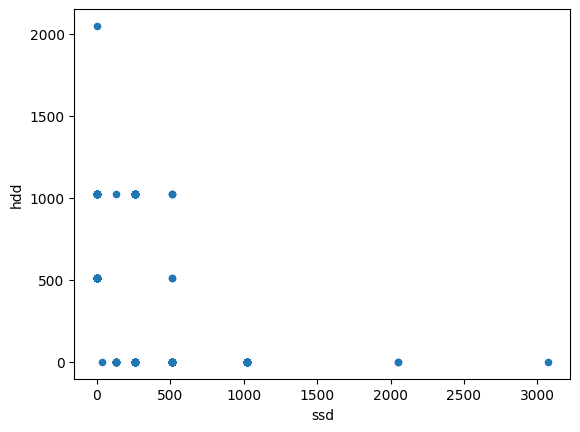

In [20]:
ssd_to_hdd = df[['ssd','hdd']]
print(ssd_to_hdd)
ssd_to_hdd.plot(kind = 'scatter', x = 'ssd', y = 'hdd')

This scatter plot shows that most laptops have either an ssd or hdd, or in most cases, if both exist, ssd doesnt have a large value, and neither the hdd. Although some multicollinearity might be suspected here, we cannot disregard any of the two features, since some laptops might have both ssd and hdd that would probably affect the laptop's price, even if the dataset doesn't contain large instances of this case. We can deduce from the scatter plot that their tends to be a negative relationship between ssd and hdd, since in most cases, a laptop will have one of the two.

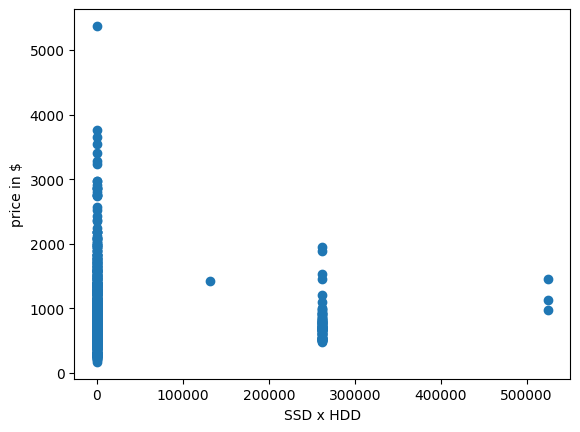

In [21]:
plt.scatter( df['hdd']*df['ssd'],df['latest_price'])
plt.ylabel("price in $")
plt.xlabel("SSD x HDD")
plt.show()

We suspected that laptops with both SSD and HDD might have higher prices on average, however the results of the scatter plot of the interaction term (ssd*hdd) vs the prices shows no pattern whatsoever.

##Brands


In [22]:
print(df['brand'].value_counts())

ASUS         252
DELL         151
Lenovo       147
HP           142
acer          57
MSI           52
APPLE         28
Avita         18
LG             5
Vaio           5
realme         4
Infinix        4
Nokia          4
lenovo         3
Smartron       3
MICROSOFT      3
RedmiBook      3
Mi             2
iball          1
SAMSUNG        1
Name: brand, dtype: int64


The data above indicates that most of the dataset laptop brands are either ASUS, DELL,Lenovo, or HP. This is inevitable since these brands are the most popular ones in the market these days, and it is reflected in our dataset. However, this also means that our model will most probably give more accurate results on training data that belong to these brands. This must be taken into consideration when assesing our model in the next phase.

##Brand in relation to Price

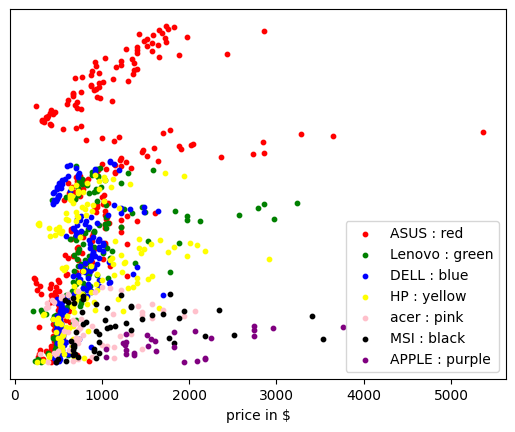

In [23]:
brands = [
    'ASUS',
    'Lenovo',
    'DELL',
    'HP',
    'acer',
    'MSI',
    'APPLE'
]

asus = df[df['brand'] == 'ASUS']
lenovo = df[df['brand'] == 'Lenovo']
DELL = df[df['brand'] == 'DELL']
hp = df[df['brand'] == 'HP']
acer = df[df['brand'] == 'acer']
msi = df[df['brand'] == 'MSI']
apple = df[df['brand'] == 'APPLE']

brand_lists = [ df[df['brand'] == brand] for brand in brands]
  
colors = ['red', 'green', 'blue', 'yellow','pink','black','purple']
legend = []
for brand, processor, color in zip(brands, brand_lists, colors):
  plt.scatter(processor['latest_price'], range(processor.shape[0]), color=color, s=10)
  legend.append(f'{brand} : {color}')

ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel("price in $")
plt.legend(legend, loc= 'best')
plt.show()

This scatter plot shows no direct relation between the brand of the laptop and its price, which is expected, since prices will depend on high specs rather than certain brands.

##SSD in relation to Price

In [24]:
print(df['ssd'].value_counts())

512     416
256     201
0       141
1024    111
128      12
2048      2
32        1
3072      1
Name: ssd, dtype: int64


The data above shows that only 4 ssd values should be taken into account, since the rest are rare in our dataset and in real life as well, so the most important values are 512, 256 , 0 , and 1024.

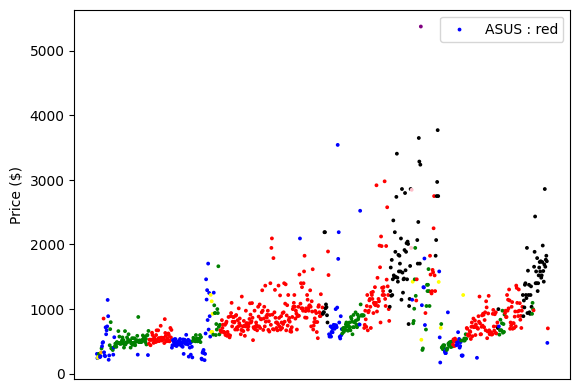

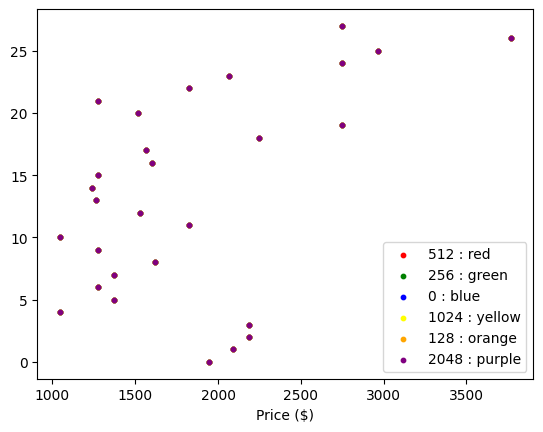

In [25]:
color_map = {
    512 : 'red',
    256 : 'green',
    0 : 'blue',
    1024 : 'black',
    128 : 'yellow',
    2048:'pink',
    32:'orange',
    3072:'purple'
}

plt.scatter(range(df.shape[0]), df['latest_price'], c=df['ssd'].map(color_map), s=3)
plt.legend(legend, loc= 'best')
plt.ylabel("Price ($)")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()




ssd = [
    512 ,
    256 ,
    0 ,
    1024 ,
    128 ,
    2048,

]

i3_processors = df[df['ssd'] == 512]
i5_processors = df[df['ssd'] == 256]
i7_processors = df[df['ssd'] == 0]
ryzen3_processors = df[df['ssd'] == 1024]
ryzen5_processors = df[df['ssd'] == 128]
ryzen7_processors = df[df['ssd'] == 2048]


processor_lists = [ df[df['ssd'] == ssd1] for ssd1 in ssd]
  
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']
legend = []
for ssd1, ssd2, color in zip(ssd, processor_lists, colors):
  plt.scatter(processor['latest_price'], range(processor.shape[0]), color=color, s=10)
  legend.append(f'{ssd1} : {color}')

ax = plt.gca()
ax.get_yaxis().set_visible(True)
plt.xlabel("Price ($)")
plt.legend(legend, loc= 'best')
plt.show()

The most important points that can be deduced from the above scatter plot are: 
For SSD = 256 (green dots), the price is ranging between 500-1000 dollars.For SSD = 512 (red dots), the price is now ranging between 1000-2000 dollars, and for SSD = 1034, prices ane now significantly increasing in the range 1000-3000 dollars. This imposes a positive relationship between the price and the ssd. The rest of the dots are ignored since they do not have enough data to deduce a pattern from. 

##HDD in relation to Price

In [26]:
print(df['hdd'].value_counts())

0       665
1025    164
512      55
2048      1
Name: hdd, dtype: int64


In the dataset, most laptops dont have hdd, the second most common value is 1025 GB, and the other values are not representable.

In [27]:
hdds=[0, 512, 1025]
for hdd in hdds:
  temp_df = df[df['hdd'] == hdd]
  print(hdd, "HDD: ", temp_df['latest_price'].describe())

0 HDD:  count     665.000000
mean      983.221083
std       559.082912
min       242.980000
25%       607.630000
50%       850.740000
75%      1154.610000
max      5372.430000
Name: latest_price, dtype: float64
512 HDD:  count      55.000000
mean      853.039818
std       720.198500
min       170.050000
25%       279.450000
50%       619.790000
75%      1271.160000
max      3539.440000
Name: latest_price, dtype: float64
1025 HDD:  count     164.000000
mean      645.743476
std       238.101467
min       254.040000
25%       486.080000
50%       597.290000
75%       745.547500
max      1944.690000
Name: latest_price, dtype: float64


Based on the above statistics, there can be a negative relationship between the lapop's expected price and the size of the HDD, since newer laptops wih higher specs mainly do not have HDD and rather provide faster SSD.

##RAM size in relation to Price


In [28]:
ramsValues = df['ram_gb'].unique()
rams = [4, 8, 16, 32]
for ram in rams:
  temp_df = df[df['ram_gb'] == ram]
  print(ram, "RAM: ", temp_df['latest_price'].describe())

4 RAM:  count     254.000000
mean      705.371969
std       421.821948
min       170.050000
25%       437.460000
50%       539.785000
75%       904.135000
max      2856.330000
Name: latest_price, dtype: float64
8 RAM:  count     448.000000
mean      807.653527
std       335.255742
min       303.760000
25%       595.480000
50%       729.180000
75%       911.510000
max      3539.440000
Name: latest_price, dtype: float64
16 RAM:  count     180.000000
mean     1445.912111
std       700.719025
min       668.410000
25%       972.290000
50%      1215.390000
75%      1701.590000
max      5372.430000
Name: latest_price, dtype: float64
32 RAM:  count       3.000000
mean     2053.723333
std      1720.534201
min       326.960000
25%      1196.605000
50%      2066.250000
75%      2917.105000
max      3767.960000
Name: latest_price, dtype: float64


As ram sizes increase, the average price increases. Therefore, there is a clear positive relationship between the ram size and a laptop's price. 

##GPU memory size in relation to Price

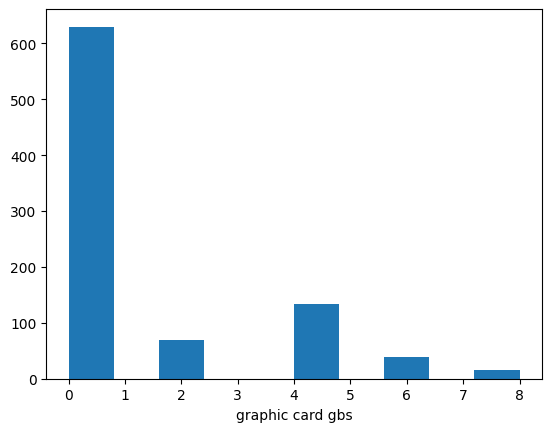

In [29]:
plt.hist(df['graphic_card_gb'])
plt.xlabel("graphic card gbs")
plt.show()

We observed in the histogram that there are only 5 possibles values (0,2,4,6,8) for graphics cards gbs (even though it is a numerical value). We can also observe from the histogram that most laptops don't have GPUs. 

In [30]:
for gpu_gbs in range(0, 9, 2):
  temp_df = df[df['graphic_card_gb'] == gpu_gbs]
  print(gpu_gbs, "gbs: ", temp_df['latest_price'].describe())

0 gbs:  count     630.000000
mean      793.457651
std       455.809799
min       170.050000
25%       509.482500
50%       668.410000
75%       922.262500
max      3767.960000
Name: latest_price, dtype: float64
2 gbs:  count      69.000000
mean      939.755797
std       342.249512
min       561.570000
25%       753.490000
50%       862.890000
75%      1008.750000
max      2975.580000
Name: latest_price, dtype: float64
4 gbs:  count     133.000000
mean     1070.355940
std       384.145224
min       326.960000
25%       827.760000
50%       972.290000
75%      1215.390000
max      2856.330000
Name: latest_price, dtype: float64
6 gbs:  count      38.000000
mean     1779.377368
std       889.386619
min       926.100000
25%      1188.432500
50%      1625.685000
75%      1779.080000
max      5372.430000
Name: latest_price, dtype: float64
8 gbs:  count      15.000000
mean     2181.564000
std       737.377815
min       668.410000
25%      1835.295000
50%      2090.560000
75%      2687.980000
m

When comparing latest_price of every category of gpu gb sizes, there is clear increase in average price when increasing the size of the gpu's memory.

## Touchscreen's effect on Price

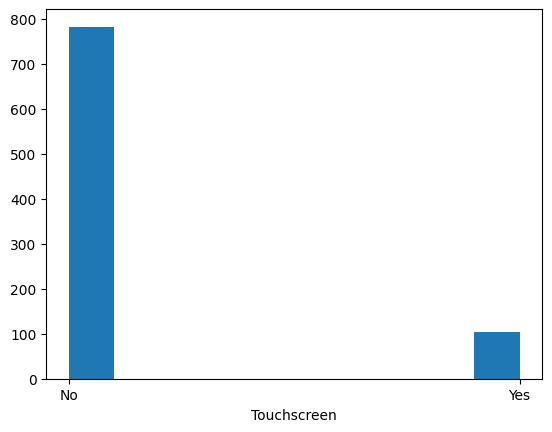

In [31]:
plt.hist(df['Touchscreen'])
plt.xlabel("Touchscreen")
plt.show()

Most laptops don't have touchscreen. However, there is a large enough of number of laptops with touchscreens to make assumptions on if there is a relation between the presence of a touchscreen and the price of a laptop.

In [32]:
with_touchscreen = df[df['Touchscreen'] == 'Yes']
print("with touchscreen: ", with_touchscreen['latest_price'].describe())
no_touchscreen = df[df['Touchscreen'] == 'No']
print("no touchscreen: ", no_touchscreen['latest_price'].describe())

with touchscreen:  count     103.000000
mean     1197.531942
std       496.974773
min       522.550000
25%       899.360000
50%      1075.580000
75%      1385.555000
max      3281.760000
Name: latest_price, dtype: float64
no touchscreen:  count     782.000000
mean      874.773427
std       537.147520
min       170.050000
25%       531.392500
50%       729.180000
75%      1008.750000
max      5372.430000
Name: latest_price, dtype: float64


Laptops with touchscreens on average(mean) are about 300$ (big jump in price) more expensive than laptops without a touchscreen.


## Laptop display size in relation to price


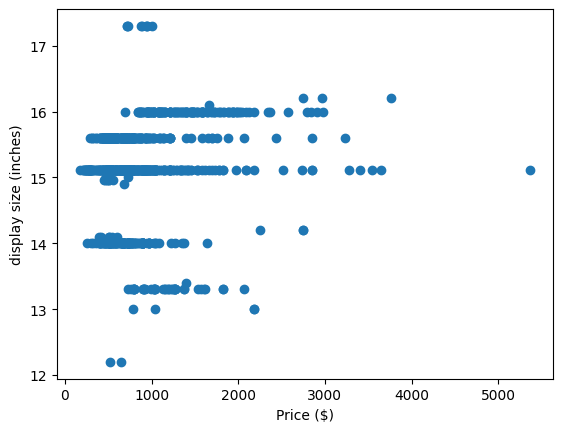

In [33]:
plt.scatter(df['latest_price'], df['display_size'])
plt.ylabel("display size (inches)")
plt.xlabel("Price ($)")
plt.show()

Display size doesn't seem to affect the price of a laptop that much. However, from the scatter plot above, it's safe to assume that a large laptop size may increase it's price. This can be explained by the fact that a laptop with a larger display size is a larger laptop as a whole. So this larger laptop can contain larger/faster hardware in comparison to smaller laptops. 

In the end, we can say that the laptop size is a limiting factor on how expensive a laptop can get. (a laptop cannot contain high specifications if its size is too small, so its price will tend to be lower)

## Laptop weight in relation to Price

weight column is categorical and has 3 possible values:
- ThinNlight
- Casual
- Gaming **(which is heavier)**

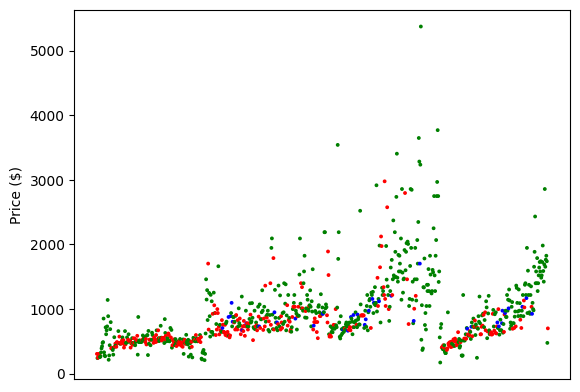

In [34]:
# Map weight categories to the colors
color_map = {
    'ThinNlight' : 'red',
    'Casual' : 'green',
    'Gaming' : 'blue'
}

plt.scatter(range(df.shape[0]), df['latest_price'], c=df['weight'].map(color_map), s=3)
plt.ylabel("Price ($)")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

The plot shows that lighter laptops tend to have lower prices (red dots). 

As for casual and gaming laptops they have a wide deviation in their prices. 

In conclusion, we can suspect that the weight['ThinNlight'] category may have an effect on the price of a laptop.

## Relation between Weight and Display Size

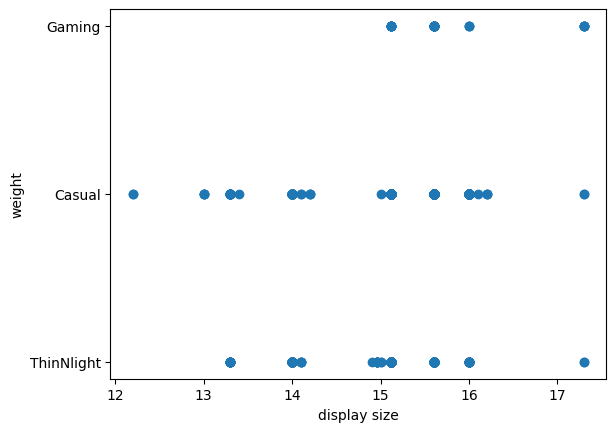

In [35]:
plt.scatter(df['display_size'], df['weight'])
plt.ylabel('weight')
plt.xlabel('display size')
plt.show()

Gaming laptops only have large displays.

ThinNlight and Casual laptops have very varying display sizes.

## Exploration of processors and relation to Price

Intel       649
AMD         208
M1           24
MediaTek      3
Qualcomm      1
Name: processor_brand, dtype: int64


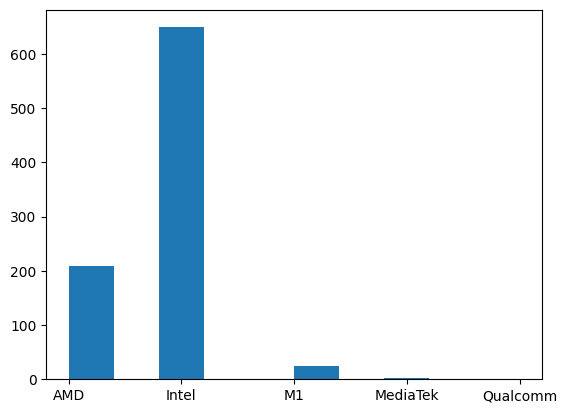

In [36]:
#processor brand view
print(df['processor_brand'].value_counts())
plt.hist(df['processor_brand'])
plt.show()

The data and the market are dominated by intel and AMD processor brank. And M1 processors are also used for some Apple laptops.

In [37]:
# intel processors models_name
intel_processors = df[df['processor_brand'] == 'Intel']
print(intel_processors['processor_name'].value_counts())

Core i5            312
Core i3            170
Core i7            112
Celeron Dual        24
Pentium Quad        14
Core i9              8
Genuine Windows      3
Hexa Core            2
Pentium Silver       2
Core m3              1
Dual Core            1
Name: processor_name, dtype: int64


In [38]:
# AMD processors models_name
amd_processors = df[df['processor_brand'] == 'AMD']
print(amd_processors['processor_name'].value_counts())

Ryzen 5              85
Ryzen 7              57
Ryzen 3              26
Ryzen 9              26
APU Dual              7
Athlon Dual           2
Dual Core             2
A6-9225 Processor     1
Ryzen                 1
Quad                  1
Name: processor_name, dtype: int64


In [39]:
df[df['processor_brand'] == 'M1']['processor_brand'].unique()

array(['M1'], dtype=object)

All M1 processor have M1 as their processor_brand value.

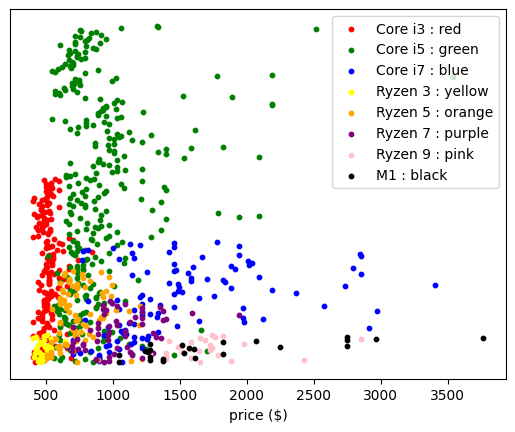

In [40]:
# processor model name depends on process brand, so will study price depending on processor's model name.
# will only make visualisations on the most important and most frequent processors names which are:
# Core i3 | Core i5 | Core i7 | Ryzen 3 | Ryzen 5 | Ryzen 7 | Ryzen 9 | M1 

processor_names = [
    'Core i3',
    'Core i5',
    'Core i7',
    'Ryzen 3',
    'Ryzen 5',
    'Ryzen 7',
    'Ryzen 9',
    'M1'
]

i3_processors = df[df['processor_name'] == 'Core i3']
i5_processors = df[df['processor_name'] == 'Core i5']
i7_processors = df[df['processor_name'] == 'Core i7']
ryzen3_processors = df[df['processor_name'] == 'Ryzen 3']
ryzen5_processors = df[df['processor_name'] == 'Ryzen 5']
ryzen7_processors = df[df['processor_name'] == 'Ryzen 7']
ryzen9_processors = df[df['processor_name'] == 'Ryzen 9']
m1_processors = df[df['processor_name'] == 'M1']

processor_lists = [ df[df['processor_name'] == processor_name] for processor_name in processor_names]
  
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'black']
legend = []
for processor_name, processor, color in zip(processor_names, processor_lists, colors):
  plt.scatter(processor['latest_price'], range(processor.shape[0]), color=color, s=10)
  legend.append(f'{processor_name} : {color}')

ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel("price ($)")
plt.legend(legend, loc= 'best')
plt.show()

It's clear that with an increase in the number of cores in the processors the price of laptop increases. (Increase in the number of cores can be deduced by an increase in the numbers in the processor_name)

Core i3 intel processors are the cheapest intel laptops. Core i7 intel processors are the most expensive intel laptops. Core i5 intel processors are in the middle range of prices.

Ryzen3 AMD processors are the cheapest ryzen laptops. Ryzen9 AMD processors are the most expensive ryzen laptops. Ryzen 5-7 AMD processors are in the middle range of prices.

Core i5 seem to be similar in price to Ryzen 5-7. Same can be said between Core i3 and Ryzen 3. As well as for Core i7 and Ryzen 9. **M1** laptops seems to be relatively more expensive than **Intel** and **AMD** laptops.

## One Hot Encoding : Transforming Categorical Data Into Numerical
## (and removing some outlier data)

In [41]:
df.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn    float64
ram_gb               int64
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight              object
display_size       float64
warranty             int64
Touchscreen         object
msoffice            object
star_rating        float64
ratings              int64
latest_price       float64
dtype: object

Our categorical features are: Brand, Model, Processor brand, Processor name, Ram type, OS, weight, msoffice and touchscreen.

In [42]:
print(df['brand'].value_counts())
print(df['model'].value_counts())
print(df['processor_brand'].value_counts())
print(df['processor_name'].value_counts())

ASUS         252
DELL         151
Lenovo       147
HP           142
acer          57
MSI           52
APPLE         28
Avita         18
LG             5
Vaio           5
realme         4
Infinix        4
Nokia          4
lenovo         3
Smartron       3
MICROSOFT      3
RedmiBook      3
Mi             2
iball          1
SAMSUNG        1
Name: brand, dtype: int64
Missing     91
VivoBook    89
Inspiron    77
Pavilion    38
IdeaPad     36
            ..
B50-70       1
GE76         1
GP65         1
GP76         1
Thinkpad     1
Name: model, Length: 116, dtype: int64
Intel       649
AMD         208
M1           24
MediaTek      3
Qualcomm      1
Name: processor_brand, dtype: int64
Core i5              312
Core i3              170
Core i7              112
Ryzen 5               85
Ryzen 7               57
Ryzen 3               26
Ryzen 9               26
M1                    24
Celeron Dual          24
Pentium Quad          14
Core i9                8
APU Dual               7
Genuine Window

In [43]:
pd.set_option('display.max_rows', None)
display(df['model'].value_counts())

Missing        91
VivoBook       89
Inspiron       77
Pavilion       38
IdeaPad        36
Ryzen          35
Vostro         33
Ideapad        32
ROG            31
MacBook        28
Aspire         24
ZenBook        20
ExpertBook     16
Yoga           14
ASUS           13
Chromebook     13
Liber          13
15s            12
Spectre        12
Legion         11
Modern         10
ThinkPad       10
TUF            10
Predator        8
Swift           8
Zenbook         7
Envy            6
HP              6
GF63            6
XPS             5
Gram            5
OMEN            5
14s             5
Zephyrus        5
Prestige        5
Nitro           5
Pentium         5
Thinkbook       4
E               4
Intel           4
Katana          4
ThinkBook       4
EeeBook         4
PureBook        4
Pro             4
PURA            4
Surface         3
Travelmate      3
15              3
APU             3
Pulse           3
Notebook        3
Celeron         3
15q             3
INBook          3
t.book    

Based on the above data, the model feature has a huge number of categories that are rarely present in our dataset, making the model way more complicated than it should be, and causing computational overhead and decreasing the efficiency. So, this feature will be disregarded in our model since it will be taken into consideraion when picking the brand.

In [44]:
df = df.drop(['model'], axis=1)

In [45]:
# fixing values in laptops brands

brands_to_remove = [
  'LG',           
  'Vaio',
  'realme',
  'Infinix',
  'Nokia',
  'Smartron',
  'MICROSOFT',
  'RedmiBook',
  'Mi',         
  'iball',          
  'SAMSUNG'
]

#removing infrequent laptops brands in dataframe (remove the whole row)
df = df[ ~ df.apply(pd.Series.explode).isin(brands_to_remove)]

# lenovo rename to Lenovo
df['brand'] = df['brand'].apply(lambda row: 'Lenovo' if row == 'lenovo' else row)


df['brand'].value_counts()

ASUS      252
DELL      151
Lenovo    150
HP        142
acer       57
MSI        52
APPLE      28
Avita      18
Name: brand, dtype: int64

In [46]:
# Fixing values in processor_brands

processor_brands_to_remove = [
   'MediaTek' ,     
    'Qualcomm'
]

#removing infrequent laptops brands in dataframe (remove the whole row)
df = df[ ~ df.apply(pd.Series.explode).isin(processor_brands_to_remove)]

df['processor_brand'].value_counts()

Intel    649
AMD      208
M1        24
Name: processor_brand, dtype: int64

In [47]:
processor_names_to_remove = [
   'Snapdragon 7c' ,     
    'Ryzen',
    'Core m3',
    'A6-9225 Processor',
    'Quad',
    'Athlon Dual',
    'Pentium Silver',
    'Hexa Core',
    'MediaTek Kompanio',
    'Dual Core',
    'Genuine Windows'
]

#removing infrequent laptops brands in dataframe (remove the whole row)
df = df[ ~ df.apply(pd.Series.explode).isin(processor_names_to_remove)]


df['processor_name'].value_counts()

Core i5         312
Core i3         170
Core i7         112
Ryzen 5          85
Ryzen 7          57
Ryzen 3          26
Ryzen 9          26
Celeron Dual     24
M1               24
Pentium Quad     14
Core i9           8
APU Dual          7
Name: processor_name, dtype: int64

In [48]:
# additional reduction of number of features by transforming processor_name to a numerical feature
df_modified = df

df_modified = df_modified.drop(['brand', 'ratings', 'star_rating', 'ram_type'], axis=1)

processor_name_to_nb = {
  'Core i3': 1,
  'Core i5': 2,         
  'Core i7': 3,        
  'Core i9': 4,          
  'Ryzen 3': 1,         
  'Ryzen 5': 2,         
  'Ryzen 7': 3,        
  'Ryzen 9': 4,         
  'M1': 4,              
  'Celeron Dual': 0.75,     
  'APU Dual': 0.75,
  'Pentium Quad': 1.75   
}
df_modified['processor_name'] = df_modified['processor_name'].replace(processor_name_to_nb.keys(), processor_name_to_nb.values())

#transforming categorical features to numerical
df_modified = pd.get_dummies(df_modified, drop_first=True)

# reordering columns to have latest_price at the end
re_order_features_names = list(df_modified.columns)
re_order_features_names.remove("latest_price")
re_order_features_names.append("latest_price")
df_modified = df_modified[re_order_features_names]

print(df_modified.shape)
df_modified.columns

(885, 18)


Index(['processor_name', 'processor_gnrtn', 'ram_gb', 'ssd', 'hdd', 'os_bit',
       'graphic_card_gb', 'display_size', 'warranty', 'processor_brand_Intel',
       'processor_brand_M1', 'os_Mac', 'os_Windows', 'weight_Gaming',
       'weight_ThinNlight', 'Touchscreen_Yes', 'msoffice_Yes', 'latest_price'],
      dtype='object')

### Conversion of all categorical features into numerical is done.
### Cleaning Data (filling some missing values)

In [49]:
# attempting linear regression with df_modified
from sklearn import metrics
from sklearn.model_selection import train_test_split

df_modified['processor_gnrtn'] = df_modified['processor_gnrtn'].fillna(0)
df_modified['processor_name'] = df_modified['processor_name'].fillna(2)

##Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

column_names = df_modified.columns
x = df_modified.iloc[:,:-1] #returns a numpy array

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled['18'] = df_modified['latest_price'].to_numpy()
column_names_new = df_scaled.columns
renaming_map = dict(zip(column_names_new, column_names))
df_scaled.rename(columns = renaming_map, inplace = True)
print(df_scaled.head())

   processor_name  processor_gnrtn    ram_gb       ssd       hdd    os_bit  \
0       -0.061933         0.474202 -1.039492 -1.389823  1.968682  0.407441   
1       -1.527452         0.474202 -1.039492 -1.389823  0.707720  0.407441   
2       -1.527452         0.474202 -1.039492 -0.982844 -0.550784  0.407441   
3       -1.527452         0.474202 -1.039492 -0.982844 -0.550784  0.407441   
4       -1.527452         0.474202 -1.039492 -0.575864 -0.550784  0.407441   

   graphic_card_gb  display_size  warranty  processor_brand_Intel  \
0        -0.573442      0.003777 -1.161516              -1.658312   
1        -0.573442      0.003777 -1.161516              -1.658312   
2        -0.573442      0.003777 -1.161516              -1.658312   
3        -0.573442      0.003777 -1.161516              -1.658312   
4        -0.573442      0.003777 -1.161516              -1.658312   

   processor_brand_M1    os_Mac  os_Windows  weight_Gaming  weight_ThinNlight  \
0           -0.166957 -0.180754    

In [51]:
# renaming columns to have no spaces so ols(ordinary least squares) can process them
column_names = df_scaled.columns
column_names_no_spaces = [col.replace(' ', '_') for col in column_names]
renaming_map = dict(zip(column_names, column_names_no_spaces))
df_scaled.rename(columns = renaming_map, inplace = True)
df_scaled.shape
print(df_scaled.columns)
df_scaled.head()

Index(['processor_name', 'processor_gnrtn', 'ram_gb', 'ssd', 'hdd', 'os_bit',
       'graphic_card_gb', 'display_size', 'warranty', 'processor_brand_Intel',
       'processor_brand_M1', 'os_Mac', 'os_Windows', 'weight_Gaming',
       'weight_ThinNlight', 'Touchscreen_Yes', 'msoffice_Yes', 'latest_price'],
      dtype='object')


,processor_name,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,display_size,warranty,processor_brand_Intel,processor_brand_M1,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,Touchscreen_Yes,msoffice_Yes,latest_price
0,-0.061933,0.474202,-1.039492,-1.389823,1.968682,0.407441,-0.573442,0.003777,-1.161516,-1.658312,-0.166957,-0.180754,0.25742,-0.214707,1.428719,-0.362924,-0.696347,303.76
1,-1.527452,0.474202,-1.039492,-1.389823,0.707720,0.407441,-0.573442,0.003777,-1.161516,-1.658312,-0.166957,-0.180754,0.25742,-0.214707,-0.699928,-0.362924,-0.696347,238.12
2,-1.527452,0.474202,-1.039492,-0.982844,-0.550784,0.407441,-0.573442,0.003777,-1.161516,-1.658312,-0.166957,-0.180754,0.25742,-0.214707,1.428719,-0.362924,-0.696347,242.98
3,-1.527452,0.474202,-1.039492,-0.982844,-0.550784,0.407441,-0.573442,0.003777,-1.161516,-1.658312,-0.166957,-0.180754,0.25742,-0.214707,1.428719,-0.362924,-0.696347,261.21
4,-1.527452,0.474202,-1.039492,-0.575864,-0.550784,0.407441,-0.573442,0.003777,-1.161516,-1.658312,-0.166957,-0.180754,0.25742,-0.214707,1.428719,-0.362924,-0.696347,303.76


## Backward elimination 

In [52]:
from statsmodels.formula.api import ols

features_for_model = '+'.join(df_scaled.columns.difference(['latest_price']))
model = ols(f'latest_price ~ {features_for_model}', data=df_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           latest_price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     135.4
Date:                Fri, 05 May 2023   Prob (F-statistic):          4.30e-230
Time:                        12:10:07   Log-Likelihood:                -6253.7
No. Observations:                 885   AIC:                         1.254e+04
Df Residuals:                     867   BIC:                         1.263e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               912.3374      9.629     94.745      0.000     893.438     931.237
Touchscreen_Yes          97.1651     10.712      9.071      0.000      76.141     118.189
display_size             68.4802     10.810      6.335      0.000      47.264      89.696
graphic_card_gb         112.2177     13.102      8.565      0.000      86.502     137.933
hdd                      64.6679     12.422      5.206      0.000      40.288      89.048
msoffice_Yes            -12.4639     11.388     -1.094      0.274     -34.816       9.888
os_Mac                  115.0238     28.478      4.039      0.000      59.130     170.918
os_Windows             -121.2202     15.695     -7.724      0.000    -152.024     -90.417
os_bit                  -23.2745     11.342     -2.052      0.040     -45.536      -1.013
processor_brand_Intel    68.3672     11.573      5.907      0.000      45.653      91.082
processor_brand_M1      -62.2808     26.177     -2.379      0.018    -113.659     -10.903
processor_gnrtn           9.0332     10.559      0.855      0.393     -11.692      29.758
processor_name          168.3491     16.134     10.434      0.000     136.682     200.016
ram_gb                   63.1961     12.309      5.134      0.000      39.037      87.355
ssd                     218.4467     16.171     13.509      0.000     186.708     250.185
warranty                -23.7476     11.684     -2.032      0.042     -46.680      -0.815
weight_Gaming           -56.2663     10.405     -5.408      0.000     -76.688     -35.845
weight_ThinNlight        33.4014     11.520      2.899      0.004      10.791      56.012
==============================================================================
Omnibus:                      448.904   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4550.134
Skew:                           2.078   Prob(JB):                         0.00
Kurtosis:                      13.302   Cond. No.                         7.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# processor_gnrtn has the highest p-value of all features so we will remove it

features_for_model = '+'.join(df_scaled.columns.difference(['latest_price', 'processor_gnrtn']))
model = ols(f'latest_price ~ {features_for_model}', data=df_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           latest_price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     143.8
Date:                Fri, 05 May 2023   Prob (F-statistic):          5.08e-231
Time:                        12:10:07   Log-Likelihood:                -6254.0
No. Observations:                 885   AIC:                         1.254e+04
Df Residuals:                     868   BIC:                         1.262e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               912.3374      9.628     94.760      0.000     893.441     931.234
Touchscreen_Yes          97.3939     10.707      9.097      0.000      76.380     118.408
display_size             68.4347     10.808      6.332      0.000      47.222      89.647
graphic_card_gb         112.6561     13.090      8.606      0.000      86.964     138.348
hdd                      65.4124     12.389      5.280      0.000      41.096      89.729
msoffice_Yes            -12.1159     11.379     -1.065      0.287     -34.450      10.218
os_Mac                  113.2689     28.400      3.988      0.000      57.529     169.009
os_Windows             -122.1062     15.658     -7.798      0.000    -152.838     -91.374
os_bit                  -23.4754     11.338     -2.070      0.039     -45.729      -1.222
processor_brand_Intel    65.8716     11.198      5.883      0.000      43.894      87.849
processor_brand_M1      -60.8746     26.121     -2.330      0.020    -112.143      -9.606
processor_name          166.6904     16.015     10.408      0.000     135.258     198.123
ram_gb                   65.1179     12.100      5.381      0.000      41.368      88.867
ssd                     221.0408     15.881     13.918      0.000     189.870     252.211
warranty                -22.8817     11.638     -1.966      0.050     -45.724      -0.039
weight_Gaming           -56.0635     10.400     -5.390      0.000     -76.476     -35.650
weight_ThinNlight        33.9769     11.499      2.955      0.003      11.408      56.546
==============================================================================
Omnibus:                      446.896   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4495.939
Skew:                           2.068   Prob(JB):                         0.00
Kurtosis:                      13.238   Cond. No.                         6.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
df.shape

(885, 19)

In [55]:
# msoffice_Yes has the highest p-value of all features so we will remove it now

features_for_model = '+'.join(df_scaled.columns.difference(['latest_price', 'processor_gnrtn', 'msoffice_Yes']))
model = ols(f'latest_price ~ {features_for_model}', data=df_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           latest_price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     153.3
Date:                Fri, 05 May 2023   Prob (F-statistic):          7.07e-232
Time:                        12:10:07   Log-Likelihood:                -6254.6
No. Observations:                 885   AIC:                         1.254e+04
Df Residuals:                     869   BIC:                         1.262e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               912.3374      9.629     94.753      0.000     893.439     931.236
Touchscreen_Yes          96.2615     10.655      9.035      0.000      75.350     117.173
display_size             69.5155     10.761      6.460      0.000      48.395      90.636
graphic_card_gb         113.5153     13.066      8.688      0.000      87.870     139.160
hdd                      65.2794     12.390      5.269      0.000      40.962      89.596
os_Mac                  115.4346     28.329      4.075      0.000      59.833     171.036
os_Windows             -122.1248     15.659     -7.799      0.000    -152.859     -91.391
os_bit                  -23.4925     11.339     -2.072      0.039     -45.748      -1.237
processor_brand_Intel    66.3380     11.190      5.928      0.000      44.376      88.300
processor_brand_M1      -60.9891     26.123     -2.335      0.020    -112.261      -9.717
processor_name          167.4847     15.999     10.469      0.000     136.084     198.886
ram_gb                   64.8148     12.098      5.358      0.000      41.070      88.559
ssd                     220.3069     15.868     13.884      0.000     189.164     251.450
warranty                -28.4462     10.400     -2.735      0.006     -48.858      -8.034
weight_Gaming           -57.2532     10.341     -5.536      0.000     -77.550     -36.957
weight_ThinNlight        32.7436     11.441      2.862      0.004      10.288      55.199
==============================================================================
Omnibus:                      448.645   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4505.268
Skew:                           2.080   Prob(JB):                         0.00
Kurtosis:                      13.241   Cond. No.                         6.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the features now have a p-value lower than the threshold of 0.05. So we are now done with backward elimination

Function for plotting predicted_y vs actual_y

In [56]:
def plot_graph(y_test, y_pred, regressor_name):
  if max(y_test) >= max(y_pred):
      my_range = int(max(y_test))
  else:
      my_range = int(max(y_pred))
  plt.figure(figsize=(5, 5))
  plt.scatter(y_test, y_pred, color='red', s=3)
  plt.plot(range(my_range), range(my_range), linewidth=2)
  plt.title(regressor_name)
  plt.xlabel('Actual Y value')
  plt.ylabel('Prediction value')
  plt.show()

##Train Test Split 

In [57]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x1 = df_scaled.iloc[:, :-1]
y1 = df_scaled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state = 0, test_size = 0.2)

##K-Fold Cross Validation

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

##Linear Regression 

                            OLS Regression Results                            
Dep. Variable:           latest_price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     113.8
Date:                Fri, 05 May 2023   Prob (F-statistic):          5.98e-187
Time:                        12:10:08   Log-Likelihood:                -4983.9
No. Observations:                 708   AIC:                         1.000e+04
Df Residuals:                     690   BIC:                         1.009e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        912.1887     10.537     86.572      0.0

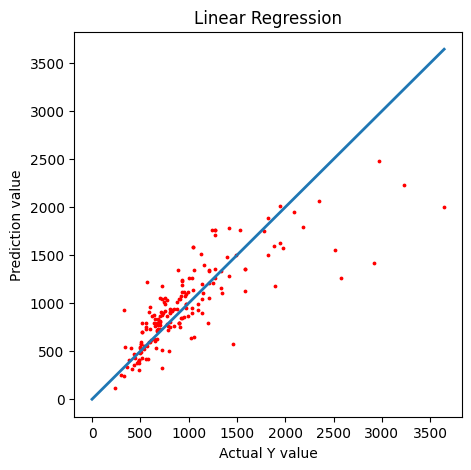

[0.62379282 0.76009493 0.73522713 0.73536305 0.73535803 0.60798818
 0.69282456 0.69741187 0.69147542 0.73035235]
0.7009888353867242


In [59]:
import statsmodels.api as sm
from sklearn import linear_model
X_train2 = sm.add_constant(X_train.values)
mod2 = sm.OLS(y_train, X_train2)
result2 = mod2.fit()
print(result2.summary())
X_test2 = sm.add_constant(X_test.values)
y_pred = result2.predict(X_test2)
MSELR = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(MSELR)
print(f'\nRMSE value: {rmse}')

plot_graph(y_test, y_pred, 'Linear Regression')

#Linear Regression with K-Fold Cross Validation
model = linear_model.LinearRegression()
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
print(scores)

sum = 0
for score in scores:
  sum += score
print(sum / len(scores))

##Lasso Regression

RMSE: 317.83480981285396
R squared score for lasso regression:  0.6695408168463535


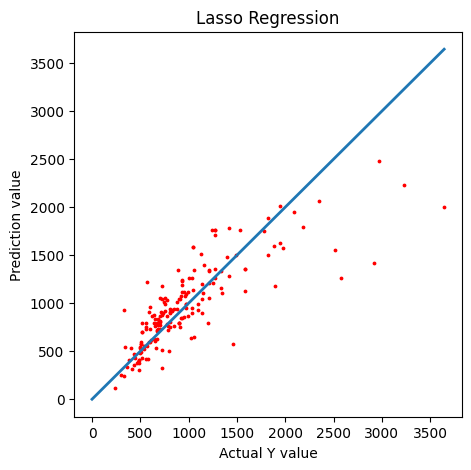

[0.62379287 0.76009489 0.73522701 0.73536397 0.73535815 0.60798888
 0.69282438 0.69741176 0.69147547 0.73035237]
0.700988974401036


In [60]:
# lasso regression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

model_lasso = Lasso(alpha=0.0001)

model_lasso.fit(X_train, y_train) 
pred_train_lasso = model_lasso.predict(X_test)
MSELasso = (mean_squared_error(y_test,pred_train_lasso))
print('RMSE:', np.sqrt(MSELasso))
print('R squared score for lasso regression: ', r2_score(y_test, pred_train_lasso))

plot_graph(y_test, pred_train_lasso, 'Lasso Regression')



#Lasso Regression with K-Fold Cross Validation
scores = cross_val_score(model_lasso, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
print(scores)
sum = 0
for score in scores:
  sum += score
print(sum / len(scores))

## KNN

KNN=1: R2 score=0.6269838981463973 | RMSE=304.98599571164897
KNN=2: R2 score=0.7644799363003502 | RMSE=242.34276764579957
KNN=3: R2 score=0.8082505617889439 | RMSE=218.66695556699142
KNN=4: R2 score=0.810437453481491 | RMSE=217.41643757894613
KNN=5: R2 score=0.7980944271037084 | RMSE=224.38316080176295
KNN=6: R2 score=0.7859661783589189 | RMSE=231.024112926313
KNN=7: R2 score=0.7767311067494184 | RMSE=235.95556147077528
KNN=8: R2 score=0.7732998378860428 | RMSE=237.76176918409124
KNN=9: R2 score=0.759134831500511 | RMSE=245.07731233214628
KNN=10: R2 score=0.7540119787737223 | RMSE=247.66981959886758
KNN=11: R2 score=0.741396234395385 | RMSE=253.94141228340274
KNN=12: R2 score=0.7300360285070374 | RMSE=259.4591629030886
KNN=13: R2 score=0.730059802174215 | RMSE=259.4477383571472
KNN=14: R2 score=0.7267656388071428 | RMSE=261.0259982863428
KNN=15: R2 score=0.7242345275041121 | RMSE=262.2322207196382
KNN=16: R2 score=0.7188126473992165 | RMSE=264.7975726901543
KNN=17: R2 score=0.702466973

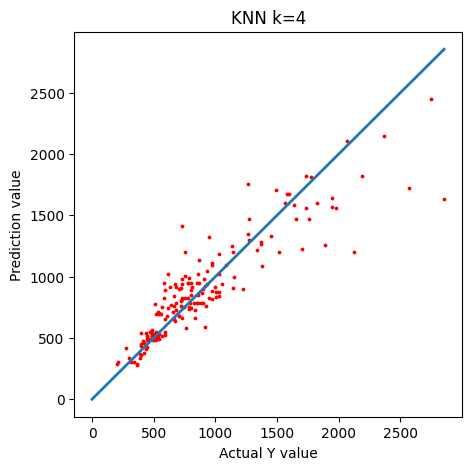


The best K using cross validation turned out to be 6 with a R2 score of 0.6656743650313658


In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

knn_R2_scores = [-1]
for k in range(1, int(885 ** 0.5)):
  knn = KNeighborsRegressor(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(error)
  knn_R2_score = r2_score(y_test, y_pred)
  print(f'KNN={k}: R2 score={knn_R2_score} | RMSE={rmse}')
  knn_R2_scores.append(knn_R2_score)

best_R2_score = max(knn_R2_scores)
best_k = knn_R2_scores.index(best_R2_score)
print(f'\nThe best K turned out to be {best_k} with a R2 score of {best_R2_score}')


print(f'Plot for KNN={best_k}')
knn = KNeighborsRegressor(n_neighbors = best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
plot_graph(y_test, y_pred, f'KNN k={best_k}')

#KNN with K-Fold Cross Validation
# scores = cross_val_score(model_lasso, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# print(scores)

knn_R2_scores_cv = [-1]
for k in range(1, int(885 ** 0.5)):
  knn = KNeighborsRegressor(n_neighbors = k)
  scores = cross_val_score(knn, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # print(scores)
  # knn.fit(X_train,y_train)
  # y_pred = knn.predict(X_test)
  # error = mean_squared_error(y_test, y_pred)
  # rmse = np.sqrt(error)
  # knn_R2_score = r2_score(y_test, y_pred)
  knn_R2_score_cv = np.sum(scores) / len(scores)
  knn_R2_scores_cv.append(knn_R2_score_cv)
best_R2_score = max(knn_R2_scores_cv)
best_k = knn_R2_scores_cv.index(best_R2_score)
print(f'\nThe best K using cross validation turned out to be {best_k} with a R2 score of {best_R2_score}')


## Support Vector Regression


In [67]:
X = df_modified.iloc[:, :-1]
y = df_modified.iloc[:, -1]
sc = StandardScaler()

X = sc.fit_transform(X) 
y = sc.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state = 42, test_size = 0.2)

In [66]:
from sklearn.svm import SVR 

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
print("SVM with train-test-split:")
for kernel in kernels:
  regressor = SVR(kernel = kernel) 
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  r2score = r2_score(y_test, y_pred)
  print(f'{kernel} R2 score: {r2score}')
  MSE = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(MSE)
  print('MSE:', MSE)
  print(f'RMSE value: {rmse}\n')

#SVR with cross validation
print("SVM with k-fold cross validation:")

for kernel in kernels:
  regressor = SVR(kernel = kernel) 
  scores_svr = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # y_pred = regressor.predict(X_test)
  sum = 0  
  for score in scores_svr:
    sum += score
  r2score =  sum / len(scores_svr)
  print(f'{kernel} R2 score: {r2score}')

SVM with train-test-split:
linear R2 score: 0.5357038771361886
MSE: 141931.94437677917
RMSE value: 376.7385623702187

poly R2 score: 0.01948390816318457
MSE: 299736.6304692156
RMSE value: 547.4820823270983

rbf R2 score: -0.0807329210014982
MSE: 330372.18550009653
RMSE value: 574.780119263094

sigmoid R2 score: 0.015889198838034968
MSE: 300835.50693805376
RMSE value: 548.4847371969923

SVM with k-fold cross validation:
linear R2 score: 0.6275222522454649
poly R2 score: 0.08653172792916634
rbf R2 score: -0.01108993017313884
sigmoid R2 score: 0.09966695621665028


Support vector regression doesn't seem to perform well with our dataset. Only the one with the linear kernel has given some okay results.

## Random Forest

In [64]:
# Using Sickit learn
from sklearn.model_selection import train_test_split

# Get the output
labels = np.array(df_scaled['latest_price'])
# Get the features
features = df_scaled.drop('latest_price', axis=1)
feature_list = list(features.columns)
features = np.array(features)

# Split the data into training and testing sets, 15% taken for testing
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

# Print the training and testing sets
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (708, 17)
Training Labels Shape: (708,)
Testing Features Shape: (177, 17)
Testing Labels Shape: (177,)


Train Test Split MSE: 57259.7859016683

Train Test Split RMSE value: 239.29017092573673

Train Test Split R2: 0.8126884211521727

Cross Val R2: [0.73212381 0.62292597 0.80971076 0.83061303 0.72658215 0.53128969
 0.71572305 0.7344305  0.72255679 0.7060868 ]

Cross Val Best R2: 0.8306130339987844


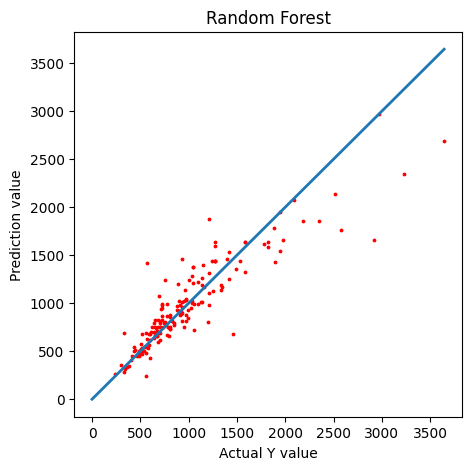

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the test data
prediction = rf.predict(x_test)

# Train Test Split, calculate MSE, RMSE, R2
MSE = mean_squared_error(y_test, prediction)
rmse = np.sqrt(MSE)
print('Train Test Split MSE:', MSE)
print(f'\nTrain Test Split RMSE value: {rmse}')
RFR_R2 = r2_score(y_test, prediction)
print(f'\nTrain Test Split R2: {RFR_R2}')

# Cross Validation
RFR_scores = cross_val_score(rf, x_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
print(f'\nCross Val R2: {RFR_scores}')
best_R2_score = max(RFR_scores)
print(f'\nCross Val Best R2: {best_R2_score}')
plot_graph(y_test, prediction, f'Random Forest')

In [62]:
#export the new dataset called output.csv
from google.colab import files
df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>